# Credit card case study

In [117]:
import numpy as np
import pandas as pd
import warnings; warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [8]:
customers = pd.read_csv("Customer_Acqusition.csv")
repayment=pd.read_csv("Repayment.csv").iloc[:1500,1:4]
spend=pd.read_csv("spend.csv")

In [7]:
customers.head()


,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [9]:
repayment.head()


,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88


In [5]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


# Q1 | a
 In the above dataset,
 In case age is less than 18, replace it with mean of age values.


In [20]:
customers.Age[customers.Age < 18]

Series([], Name: Age, dtype: float64)

In [16]:
mean_age=customers.Age.mean()
print(mean_age)

46.49


In [19]:
customers.Age[customers.Age < 18] = mean_age

# b.
 In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [24]:
temp=pd.merge(left=customers,right=spend,how="inner",on="Customer")


In [27]:
final_table = pd.merge(left=temp,right=repayment,how="inner",on="Customer",suffixes=["_spend","_repayment"])


In [28]:
final_table

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_spend,Type,Amount_spend,Month_repayment,Amount_repayment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,25-Jan-04,310992.30
37280,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26,12-Jan-04,121874.90
37281,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06,3-Jan-04,337815.57
37282,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22,15-Jan-04,25682.73


In [33]:
final_table[final_table.Amount_spend > final_table.Limit].Amount_spend = final_table[final_table.Amount_spend > final_table.Limit].Limit/2

 # c.
  Incase the repayment amount is more than the limit, replace the repayment with the 
limit.

In [38]:
final_table[final_table.Amount_repayment> final_table.Limit].Amount_repayment = final_table[final_table.Amount_repayment> final_table.Limit].Limit

# Q2 | a
How many distinct customers exist?


In [42]:
len(set(final_table.Customer))

100

# b
How many distinct categories exist?

In [44]:
len(set(final_table.Type))

15

# c
What is the average monthly spend by customers?

In [49]:
print(round(final_table["Amount_spend"].mean()))

244782


In [51]:
final_table.convert_dtypes()
final_table.Month_spend = pd.to_datetime(final_table.Month_spend)
final_table.Month_repayment=pd.to_datetime(final_table.Month_repayment)

In [56]:
final_table["Month_name"]= final_table.Month_spend.dt.month_name()

In [57]:
final_table

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_spend,Type,Amount_spend,Month_repayment,Amount_repayment,Month,Month_name
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,2004-01-12,495414.75,January,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,2004-01-03,245899.02,January,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,2004-01-15,259490.06,January,January
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,2004-01-25,437555.12,January,January
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,2005-01-17,165972.88,January,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,2004-01-25,310992.30,January,January
37280,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,139018.26,2004-01-12,121874.90,January,January
37281,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,284521.06,2004-01-03,337815.57,January,January
37282,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,90184.22,2004-01-15,25682.73,January,January


In [58]:
pd.pivot_table(data=final_table,values="Amount_spend",index="Month_name",aggfunc="mean")

,Amount_spend
Month_name,
April,238523.142863
August,239720.511903
December,196878.070512
February,234747.176488
January,258340.458509
July,267259.617102
June,246540.849746
March,248371.437667
May,240881.374086


 # d
 What is the average monthly repayment by customers?

In [59]:
pd.pivot_table(data=final_table,values="Amount_repayment",index="Month_name",aggfunc="mean")

,Amount_repayment
Month_name,
April,248978.784348
August,250377.251093
December,248882.785858
February,249917.743438
January,249130.910515
July,248613.794682
June,258173.874091
March,250092.234790
May,247962.484010


 # e.
  If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment 
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [62]:
final_table["Month_Profit"] = final_table.Amount_repayment- final_table.Amount_spend

In [84]:
final_table["intrest"]=final_table["Month_Profit"] * 2.9/100

In [85]:
final_table[final_table.intrest > 0]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_spend,Type,Amount_spend,Month_repayment,Amount_repayment,Month,Month_name,Month_Profit,intrest
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,2004-01-12,495414.75,January,January,9943.95,288.37455
18,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,2004-01-12,495414.75,January,January,84858.62,2460.89998
21,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,2004-01-25,437555.12,January,January,26998.99,782.97071
33,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,2006-04-01,429099.97,January,January,18543.84,537.77136
34,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,2004-01-15,453027.64,January,January,42471.51,1231.67379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37275,92,A92,78.0,BANGALORE,Gold,500000.0,C15,Govt,94,2006-04-04,FOOD,341858.87,2006-04-04,459105.69,April,April,117246.82,3400.15778
37276,93,A93,56.0,DELHI,Gold,500000.0,C16,Govt,95,2004-01-12,CAMERA,297505.09,2004-01-12,342326.14,January,January,44821.05,1299.81045
37278,95,A95,62.0,PATNA,Gold,500000.0,C18,Salaried_MNC,97,2004-01-15,CAR,240401.50,2004-01-15,369405.96,January,January,129004.46,3741.12934
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,2004-01-25,310992.30,January,January,256262.64,7431.61656


 # f.
  What are the top 5 product types?
 




In [89]:
pd.pivot_table(data=final_table,values="Amount_spend",index="Type",aggfunc="sum").sort_values(by="Amount_spend",ascending=False)

,Amount_spend
Type,
PETRO,1.185036e+09
CAMERA,1.096149e+09
FOOD,9.507946e+08
TRAIN TICKET,8.520288e+08
AIR TICKET,8.117523e+08
SHOPPING,7.050012e+08
BUS TICKET,6.155391e+08
CLOTHES,5.859416e+08
JEWELLERY,5.721690e+08


# or

In [91]:
type_list=final_table.groupby("Type").agg({"Amount_spend" : "sum"}).sort_values(by="Amount_spend",ascending=False)

In [92]:
type_list.iloc[:5,:]

,Amount_spend
Type,
PETRO,1.185036e+09
CAMERA,1.096149e+09
FOOD,9.507946e+08
TRAIN TICKET,8.520288e+08
AIR TICKET,8.117523e+08


# g
Which city is having maximum spend?

In [95]:
final_table.groupby("City").agg({"Amount_spend": "sum"}).sort_values(by="Amount_spend",ascending=False).iloc[:1,:]

,Amount_spend
City,
COCHIN,1.806987e+09


# h
Which age group is spending more money?

In [104]:
final_table["Age_group"]= pd.qcut(final_table.Age,3,labels=["youth","mid","old"])

In [107]:
pd.pivot_table(data=final_table,values="Amount_spend",index="Age_group",aggfunc="sum").sort_values(by="Amount_spend", ascending=False)

,Amount_spend
Age_group,
mid,3.361715e+09
youth,3.151562e+09
old,2.613175e+09


# i. 
Who are the top 10 customers in terms of repayment?

In [103]:
final_table.groupby("Customer").agg({"Amount_repayment":"sum"}).sort_values(by="Amount_repayment",ascending=False).iloc[:10,:]

,Amount_repayment
Customer,
A61,4.004874e+08
A60,3.752990e+08
A22,3.092945e+08
A21,2.988591e+08
A13,2.967320e+08
A43,2.631860e+08
A45,2.618984e+08
A12,2.583776e+08
A48,2.570649e+08


# Q3
 Calculate the city wise spend on each product on yearly basis. Also include a graphical 
representation for the same.

In [109]:
final_table["Year"]=final_table.Month_spend.dt.year

In [111]:
df = pd.pivot_table(data=final_table,values="Amount_spend",index=["City","Year"],columns="Product",aggfunc="sum")

<Axes: xlabel='City,Year'>

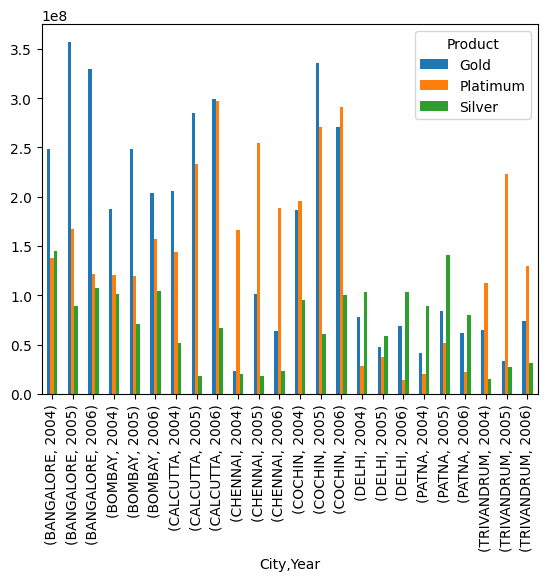

In [116]:
df.plot(kind="bar")

# 4 | a 
Create graphs for
 Monthly comparison of total spends, city wise

  c. Comparison of monthly spend for each product (look for any seasonality
     that exists in terms of spend)

<Axes: xlabel='Month'>

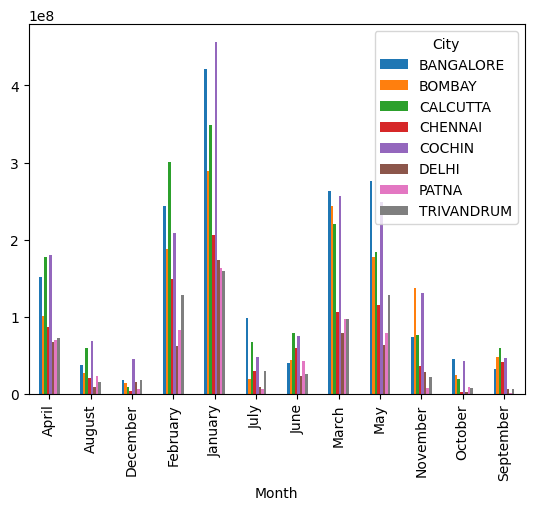

In [131]:
df = pd.pivot_table(data=final_table,values="Amount_spend",index="Month",columns="City",aggfunc="sum")
df.plot(kind="bar")

 # b.
  Comparison of yearly spend on air tickets

In [138]:
df=final_table.groupby(by="Type").agg({"Amount_spend": "sum"}).iloc[:1,:]
#pd.pivot_table(data=final_table,values="Amount_spend",index="Year",aggfunc="sum")


# 5.
 Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by 
different products and by different time periods i.e. year or month. The user should be able 
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customers.


In [ ]:
def my_func(data,products="Gold",time_period="Year"):   
    data = data[data.Product==products]
    if time_period =="Month":
        time_period_col ="Month"
    elif time_period == "Year":
        time_period_col = "Year"
    output=pd.pivot_table(data=final_table,values="Amount_spend",index="City",columns=time_period_col,aggfunc="sum")
    return output

In [127]:
my_func(data=final_table,products="Platinum",time_period="Year")

Year,2004,2005,2006
City,,,
BANGALORE,5.311312e+08,6.130503e+08,5.581705e+08
BOMBAY,4.097114e+08,4.398877e+08,4.652945e+08
CALCUTTA,4.022734e+08,5.366629e+08,6.631925e+08
CHENNAI,2.096815e+08,3.734941e+08,2.761362e+08
COCHIN,4.774691e+08,6.669894e+08,6.625288e+08
DELHI,2.095844e+08,1.433948e+08,1.856929e+08
PATNA,1.506228e+08,2.759962e+08,1.642379e+08
TRIVANDRUM,1.925994e+08,2.837451e+08,2.349054e+08


# ----------------Completed-----------------